<a href="https://colab.research.google.com/github/jchen8000/MachineLearning/blob/master/Clustering%20and%20Unsupervised%20Learning/K_means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-means Clustering

**ABSTRACT**

This is a hands-on practice of using K-means Algorithm for Unsupervised Machine Learning with Sklearn K-means model. 
1. Better understand the K-means algorithm by randomly generating clustered 2d sample points, and apply the Sklearn K-means model on the sample data, and then visualize the sample points together with their cluster centers that calculated by K-means algorithm. 
2. Apply K-means on image compression, load a sample image with more then 60K distinct colors in 256x256x256=16M color space, then use K-means to cluster them to 16 colors,  visualize the result by drawing the original image and comparing it with the reduced-color image, also visualize the colors in the 3D color space in red, green and blue axes.
3. Apply K-means on MNIST dataset which contains 60,000 handwritten digits of 28x28 pixels in ten clusters from 0 to 9. The K-means algorithm finds 10 cluster centers which are ten 28x28 images, each represents a cluster. Visualize the handwritten digits image and the ten cluster center images, also calculate the accuracy of results. 

K-means is the algorithm for unsupervised learning means the true labels are not used for learning, it will calculate the results based on its own algorithm without referencing the true labels.




## 1. Understand K-means

**K-means Algorithm**



1.   Randomly initializing the cluster centroids $\mu_1,\mu_2,...,\mu_k\in\mathbb{R}^n$
2.   Repeats the following steps until convergence:
>$ c^{(i)}=\underset{j}{\textrm{arg min}}||x^{(i)}-\mu_j||^2 \quad $  and,  $\quad\mu_j=\frac{\displaystyle\sum_{i=1}^m1_{\{c^{(i)}=j\}}x^{(i)}}{\displaystyle\sum_{i=1}^m1_{\{c^{(i)}=j\}}}$


>Note:
$c^{(i)}$ is the cluster of data point $i$; $\mu_j$ is the center of cluster $j$



In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

Randomly generate some groups of data in 2-D space, then apply the K-means on the sample data and find out the cluster centers, and plot the results.

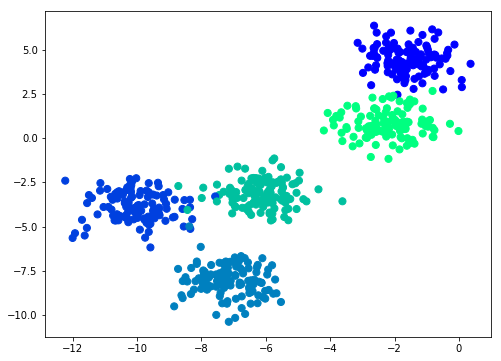

In [2]:
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=600, centers=5, cluster_std=0.8, random_state=1)

plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], X[:, 1], c=y_true, s=50, cmap='winter')
plt.show()

Then run the K-means algorithm, find out the centroid of each group of data, and make predictions.

In [0]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

In [4]:
kmeans.cluster_centers_

array([[-7.12477649, -8.09803975],
       [-1.55383662,  4.44779912],
       [-9.98787166, -3.88556349],
       [-2.17812827,  0.7903456 ],
       [-6.11398201, -3.11924685]])

Finally we plot the data with predicted values in differnt colors, and show centroid in red circle.

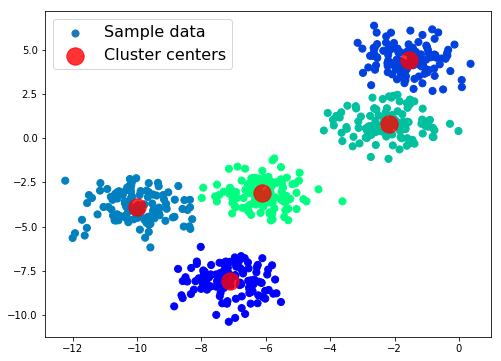

In [5]:
centers = kmeans.cluster_centers_

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='winter', label="Sample data" )
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=300, alpha=0.8, label="Cluster centers");
plt.legend(loc='upper left', fontsize=16)

plt.show()

## 2. K-means for image compression



In [0]:
from sklearn.datasets import load_sample_image
image = load_sample_image("china.jpg")


In [7]:
data = image / 255.0 # use 0...1 scale
data = data.reshape(427 * 640, 3)
print( data.shape )
reduced_colors = 16

(273280, 3)


In [0]:
from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(reduced_colors)
kmeans.fit(data)

centers = kmeans.cluster_centers_
reduced_color_image = centers[kmeans.predict(data)]


In [9]:
kmeans.cluster_centers_

array([[0.95175627, 0.96534169, 0.98905172],
       [0.20714897, 0.19327669, 0.14426473],
       [0.51303991, 0.51570998, 0.43172112],
       [0.80071267, 0.82498324, 0.84888114],
       [0.37795108, 0.26197879, 0.12957694],
       [0.59568196, 0.62875697, 0.60478791],
       [0.86568206, 0.62821135, 0.46087198],
       [0.04636143, 0.04501809, 0.02276829],
       [0.87952144, 0.91899291, 0.96364929],
       [0.46144904, 0.43325016, 0.21836221],
       [0.39060588, 0.38449022, 0.33595195],
       [0.13389004, 0.10970589, 0.07952634],
       [0.28063012, 0.29028023, 0.24265314],
       [0.71197772, 0.74977593, 0.74060657],
       [0.75644742, 0.84557963, 0.94596025],
       [0.69924531, 0.43025991, 0.30363768]])

In [0]:
def plot_image_vs_reduced(image, reduced_image):
    fig, ax = plt.subplots(1, 2, figsize=(20, 8),
                           subplot_kw=dict(xticks=[], yticks=[]))
    fig.subplots_adjust(wspace=0.05)
    ax[0].imshow(image)
    ax[0].set_title('Original Image', size=16)
    ax[1].imshow(reduced_image)
    ax[1].set_title('Reduced-color Image', size=16);
    plt.show()

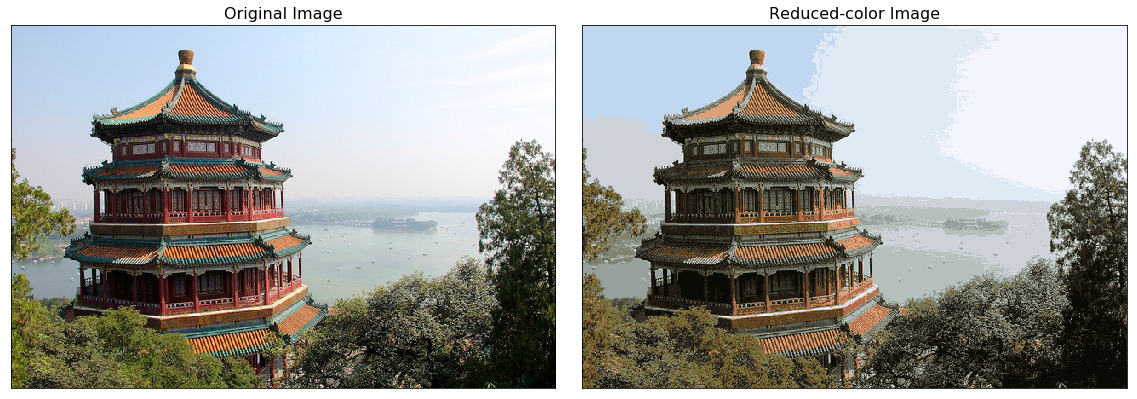

In [11]:
image_recolored = reduced_color_image.reshape(image.shape)
plot_image_vs_reduced( image, image_recolored )

In [0]:
from mpl_toolkits.mplot3d import Axes3D

def plot_colors_in_colorspace( image, reduced_colors ):

    r = []
    g = []
    b = []

    for line in image:
      for pixel in line:
        temp_r, temp_g, temp_b = pixel
        r.append(temp_r)
        g.append(temp_g)
        b.append(temp_b)
        
    fig, ax = plt.subplots(1, figsize=(12, 10))

    ax = Axes3D(fig)
    ax.scatter(r[::16], g[::16], b[::16], cmap='viridis', lw=0, s=20, alpha=0.3, label='origian color')
    ax.scatter(reduced_colors[:, 0], reduced_colors[:, 1], reduced_colors[:, 2], c='r', lw=10, s=300, alpha=0.9, label='reduced color')
    ax.set_xlabel('R color', fontsize=20)
    ax.set_ylabel('G color', fontsize=20)
    ax.set_zlabel('B color', fontsize=20)
    ax.set_title('Original color space: 16,777,216 colors', fontsize=24)
    ax.legend(loc='lower left', fontsize=16)

    plt.show()        

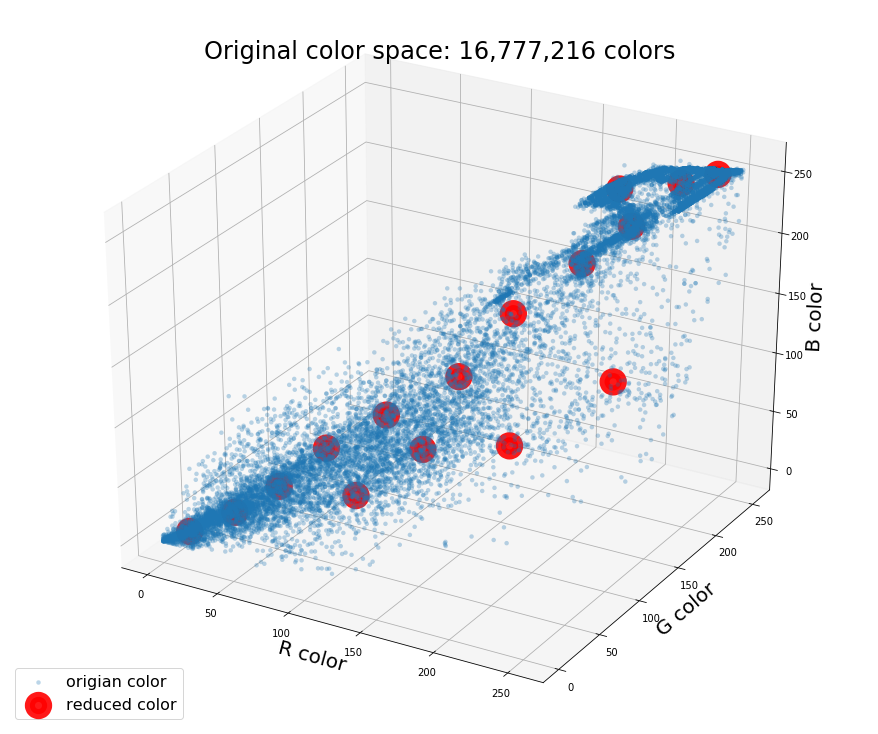

In [13]:
plot_colors_in_colorspace( image = image, reduced_colors = centers * 255 )


## 3. k-means for digits clustering

Here we will use k-means to identify similar digits of MNIST without using the original label .

In [14]:
import tensorflow as tf

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
print("X_train", X_train.shape)
print("y_train", y_train.shape)
print("X_test", X_test.shape)
print("y_test", y_test.shape)

11493376/11490434 [==============================] - 0s 0us/step
X_train (60000, 28, 28)
y_train (60000,)
X_test (10000, 28, 28)
y_test (10000,)


The small green number at the top-left is the ground truth label of the image.


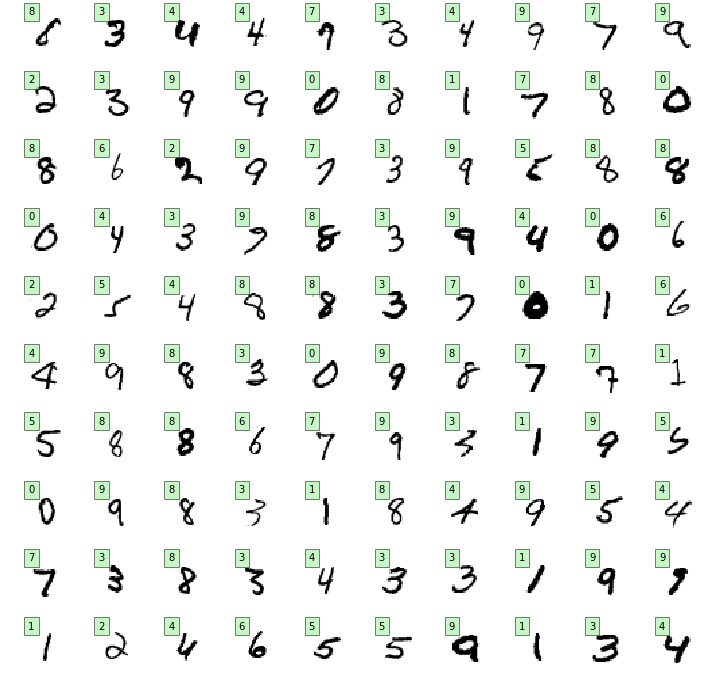

In [15]:
def plot_random_100_images(data, label, prediction = None, label_encoded = False, prediction_provided = False):
  
    print( "The small green number at the top-left is the ground truth label of the image." )
    if prediction_provided == True:
        print( "The small pink number beside it is the predicted value of the image." )
    
    _, axarr = plt.subplots(10,10,figsize=(12,12))
    plt.subplots_adjust(wspace=0.8, hspace=0.8)

    for i in range(10):
        for j in range(10):
           index = np.random.randint(data.shape[0])
           if label_encoded == False:
              groundtruth_lable = str(label.flatten()[index])
              if prediction_provided == True:
                  predicted_lable = str(prediction.flatten()[index])
           else:
              groundtruth_lable = str(np.argmax(label[index]))
              if prediction_provided == True:
                  predicted_lable = str(np.argmax(prediction[index]))
                                        
           axarr[i,j].imshow(data[index].reshape((28,28), order = 'F'), cmap="binary", interpolation="nearest")          
           axarr[i,j].axis('off')  
           axarr[i,j].text(0.5, 0.5, groundtruth_lable,bbox=dict(facecolor='lightgreen', alpha=0.5))
          
           if prediction_provided == True:
              axarr[i,j].text(10.5, 0.5, predicted_lable,bbox=dict(facecolor='pink', alpha=0.5))

              
plot_random_100_images(X_train, y_train )

In [16]:
X = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2])
y = y_train

#X = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2])
#y = y_test
print( X.shape)

(60000, 784)


In [0]:
#from sklearn.preprocessing import StandardScaler

#sc = StandardScaler()
#X = sc.fit_transform(X)

In [18]:
kmeans = MiniBatchKMeans(10)
kmeans.fit(X)

centers = kmeans.cluster_centers_
y_pred = kmeans.predict(X)

print( "centers:", centers.shape )
print( "y_pred: ", y_pred.shape )

centers: (10, 784)
y_pred:  (60000,)


The result of K-means is 10 clusters in 784 dimensions, which is 28x28. Let's see what these cluster centers look like:

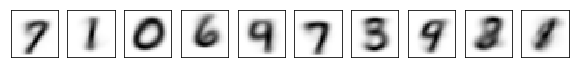

In [19]:
fig, ax = plt.subplots(1, 10, figsize=(10, 2))
centers = kmeans.cluster_centers_.reshape(10, 28, 28)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

In [0]:
from scipy.stats import mode

labels = np.zeros_like(y_pred)
for i in range(10):
    mask = (y_pred == i)
    labels[mask] = mode(y[mask])[0]

In [21]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

acs = accuracy_score(y, labels)
mat = confusion_matrix(y, labels)

print( "Accuracy: ", acs )
print( "Confusion Matrix: \n", mat )

Accuracy:  0.56235
Confusion Matrix: 
 [[4780  120  485  249   32    0  215   18    0   24]
 [   0 6686   16    9    9    0   10    9    0    3]
 [  65 1234 3460  338  190    0  540  127    0    4]
 [  29  554 1244 3962  111    0   68   77    0   86]
 [   9  715    8    0 2482    0  109  310    0 2209]
 [  73 1516  397 2179  210    0  113   61    0  872]
 [  87  651   57   45  172    0 4899    1    0    6]
 [  11  468   18    3  397    0    5 5243    0  120]
 [  26 1331 1906 1548  182    0   40  159    0  659]
 [  40  354   12  107 1991    0    6 1210    0 2229]]
